# Imports

In [1]:
# data tools
import numpy as np
import pandas as pd
import pickle as pkl


# inspection tools
# from IPython.core.display import HTML
# from dataprep.eda import plot, plot_correlation, create_report, plot_missing

# date handling
import datetime
from datetime import date

# graphing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
sns.set()

# machine learning
# from sklearn.preprocessing import StandardScaler, normalize
# from sklearn import metrics
# from sklearn.mixture import GaussianMixture
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules

# import warnings
# warnings.filterwarnings('ignore')

# Load Data

In [2]:
df_raw = pd.read_csv('customer_data.csv')
df_raw

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04/09/2012       58       635  ...                  7   
1            1  08/03/2014       38        11  ...                  5   
2            0  21/08/2013       26       426  ...                  4   
3            0  10/02/2014       26        11  ...                  6   
4            0  19/01/2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13/06/2013       46       709  ...                  5   
2236         1  10/06/2014       56       406  ...                  7   
2237         0  25/01/2014       91       908  ...                  6   
2238         1  24/01/2014        8       428  ...                  3   
2239         1  15/10/2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
df_raw.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Preliminary Data Inspection

In [4]:
# plot(df_raw)

In [5]:
data = df_raw.dropna().copy()

# Feature Creation

In [6]:
# Age

data['Customer_Age']=2014-data['Year_Birth']

# Total Expenses
data['Total_Expenses']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

#Seniority variable creation
last_date = date(2014,10, 4)
data['Seniority']=pd.to_datetime(data['Dt_Customer'], dayfirst=True,format = '%d/%m/%Y')
data['Seniority'] = pd.to_numeric(data['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30

# Total number of children (teen and kid)
data['Child_Count']=data['Kidhome']+data['Teenhome']

# Boolean value for children
data['Has_child'] = np.where(data.Child_Count> 0, 'Has child', 'No child')

# Feature editing

## Grouping

In [7]:
# Group marital data
data['Marital_Status'] = data['Marital_Status'].replace({'Divorced': 'Alone',
                                                         'Single': 'Alone',
                                                        'Married': 'Couple',
                                                         'Together': 'Couple',
                                                         'Absurd': 'Alone',
                                                         'Widow': 'Alone',
                                                         'YOLO': 'Alone'})
# Group education data
data['Education'] = data['Education'].replace({'Basic': 'Undergraduate',
                                               '2n Cycle': 'Undergraduate',
                                              'Graduation': 'Postgraduate',
                                               'Master': 'Postgraduate',
                                               'PhD': 'Postgraduate'})

## Renaming

In [8]:
# Rename some columns
data = data.rename(columns={'NumWebPurchases': "Web",
                            'NumCatalogPurchases': 'Catalog',
                            'NumStorePurchases': 'Store',
                            'MntWines': "Wines",
                            'MntFruits': 'Fruits',
                            'MntMeatProducts': 'Meat',
                            'MntFishProducts': 'Fish',
                            'MntSweetProducts': 'Sweets',
                            'MntGoldProds': 'Gold'})


# Replace Children into human readable values
# data['Children'].replace({3: "3 children",
#                           2: '2 children',
#                           1: '1 child',
#                           0: "No child"}, inplace=True)

# Explore the Data

Text(0, 0.5, 'Total_Expenses')

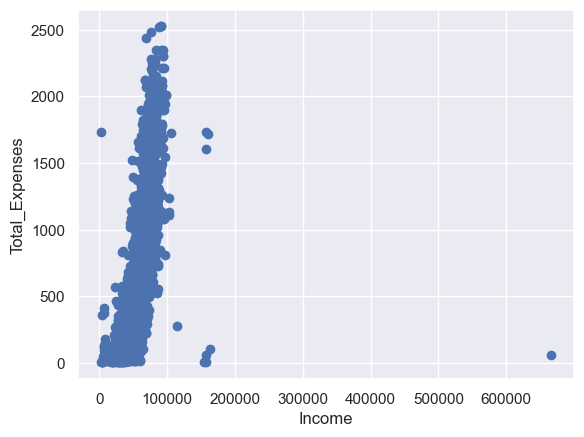

In [9]:
# Select variables and data
x = 'Income'
y = 'Total_Expenses'
plot_data = data.copy()

# plot
plt.scatter(x=plot_data[x], y=plot_data[y])
plt.xlabel(x)
plt.ylabel(y)

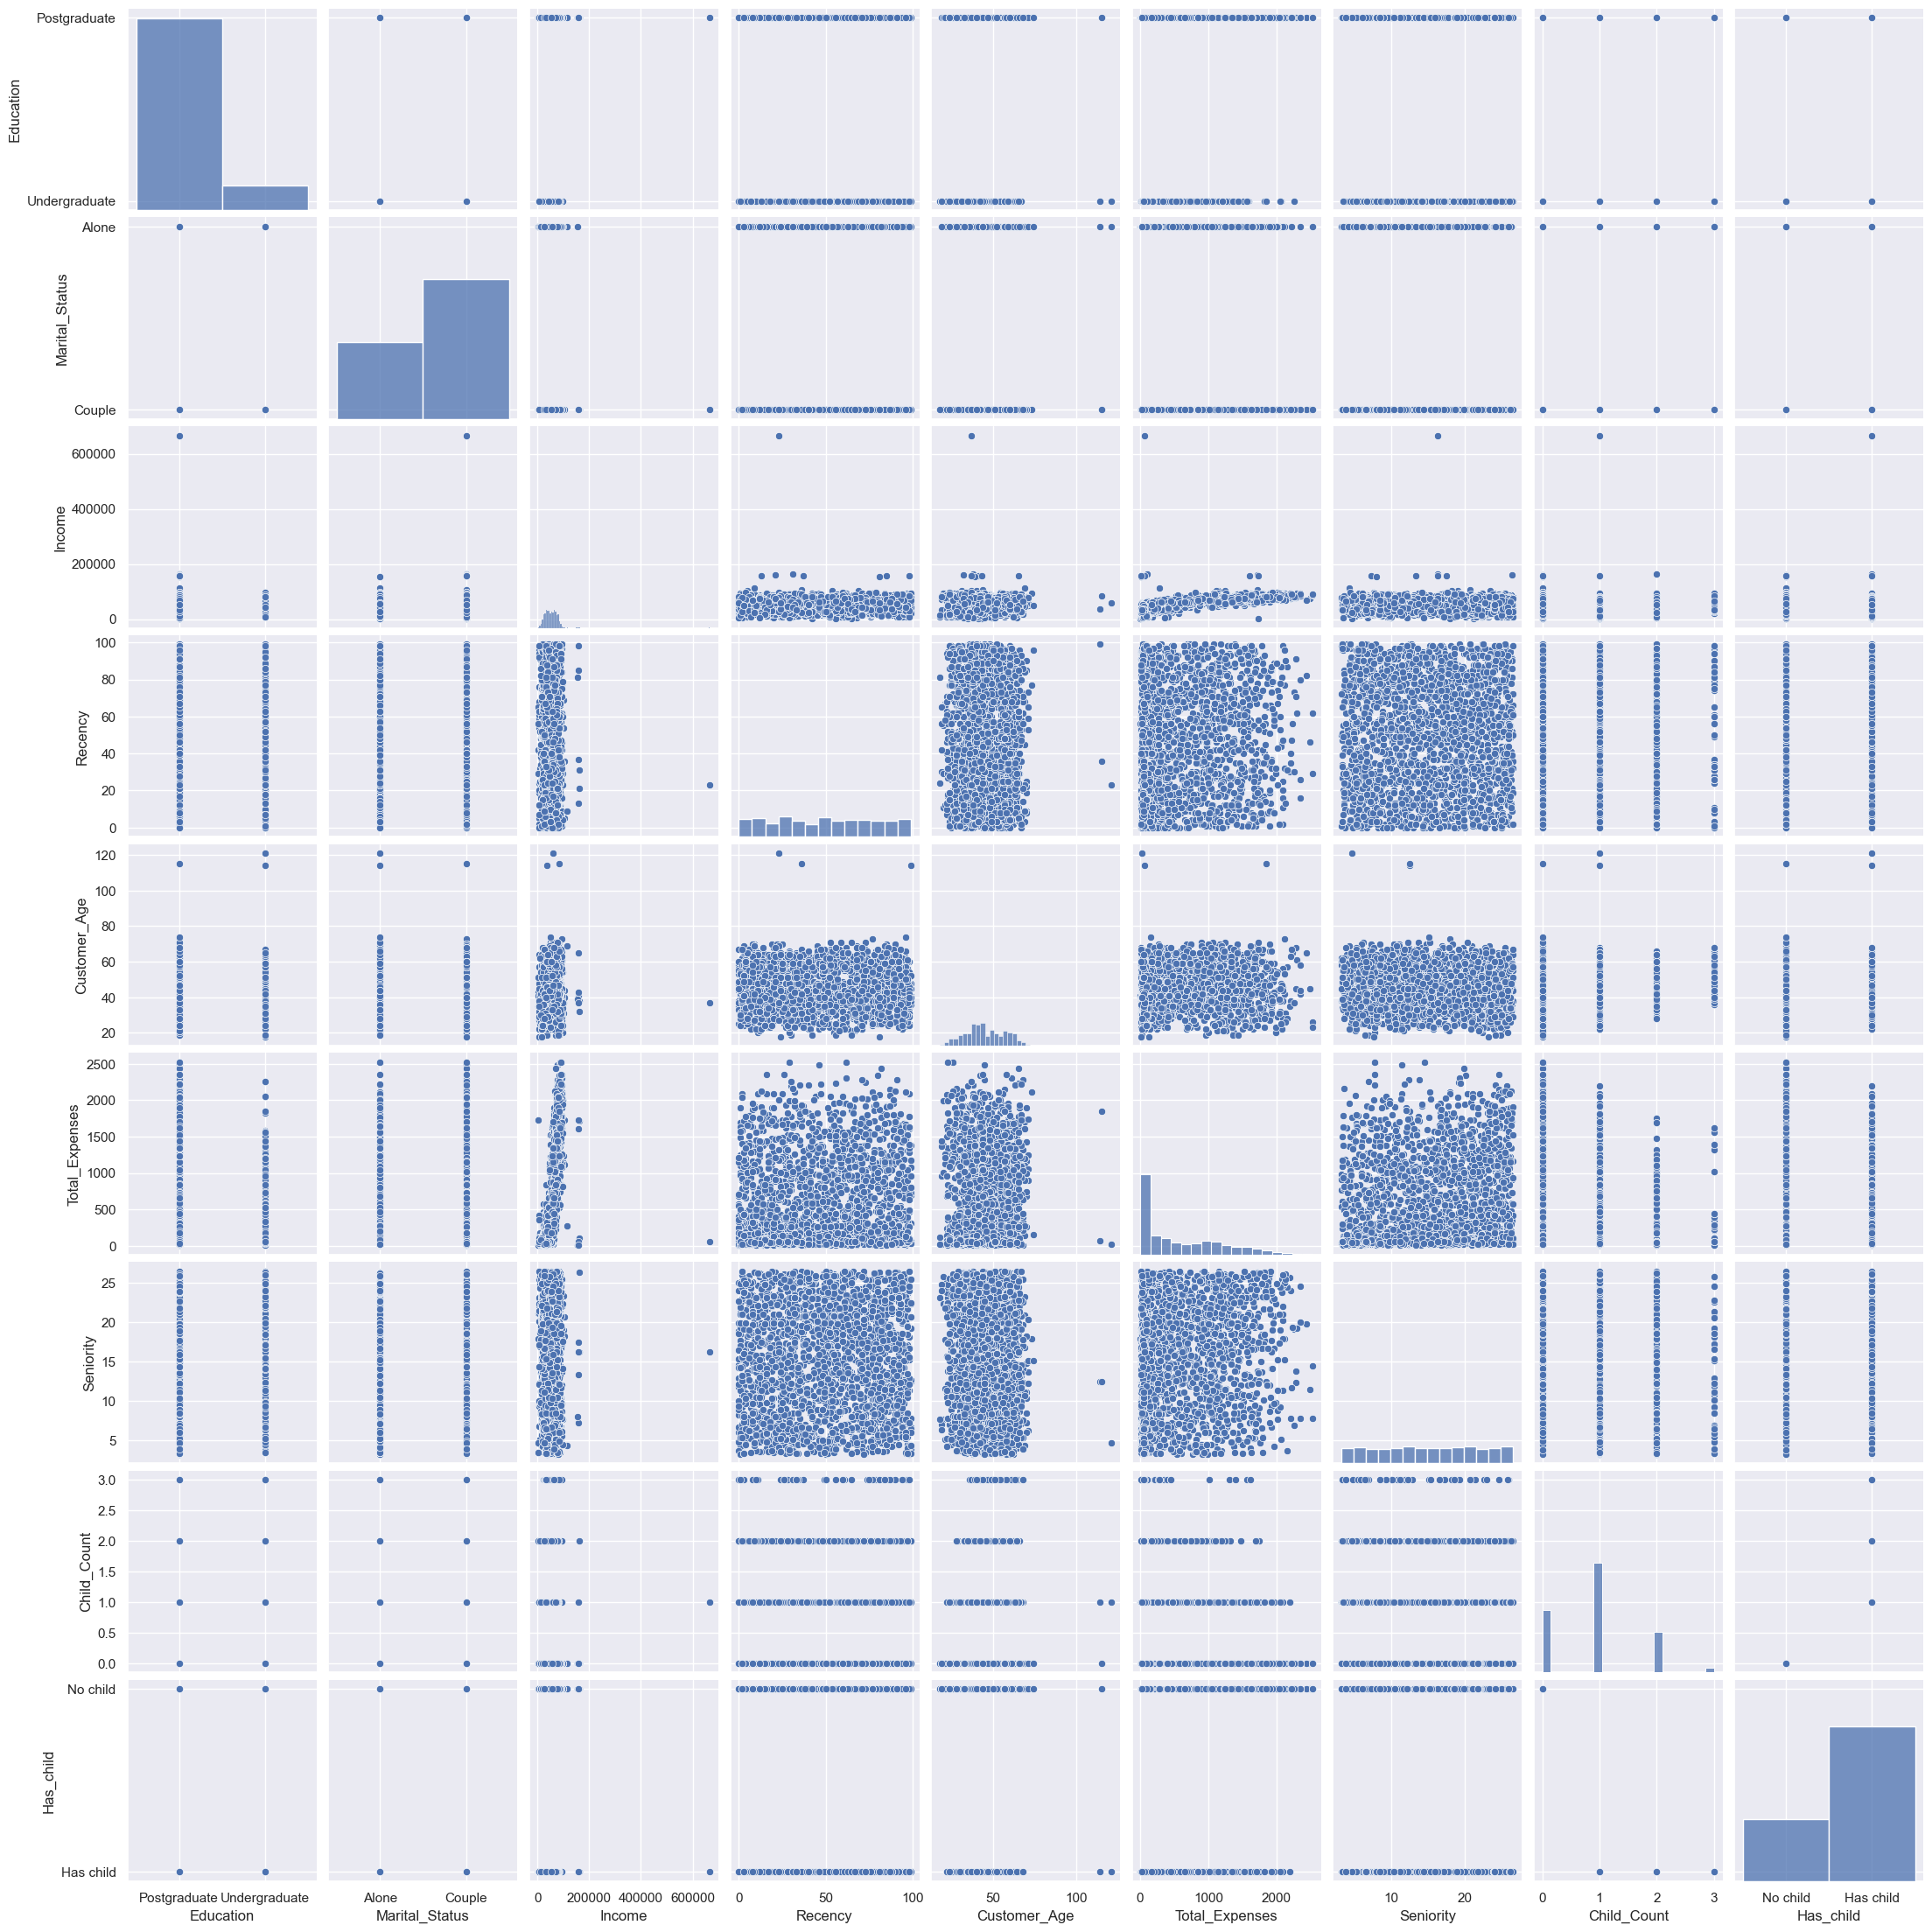

In [10]:
# pairplot
plot_data = data.copy()

# choosing features to use
# NOTE - these will be the features used in clustering

plot_features = [  # 'ID',
    #                  'Year_Birth',
    'Education',
    'Marital_Status',
    'Income',
    #                  'Kidhome',
    #                  'Teenhome',
    #                  'Dt_Customer',
    'Recency',
    #                  'Wines',
    #                  'Fruits',
    #                  'Meat',
    #                  'Fish',
    #                  'Sweets',
    #                  'Gold',
    #                  'NumDealsPurchases',
    #                  'Web',
    #                  'Catalog',
    #                  'Store',
    #                  'NumWebVisitsMonth',
    #                  'AcceptedCmp3',
    #                  'AcceptedCmp4',
    #                  'AcceptedCmp5',
    #                  'AcceptedCmp1',
    #                  'AcceptedCmp2',
    #                  'Complain',
    #                  'Z_CostContact',
    #                  'Z_Revenue',
    #                  'Response',
    'Customer_Age',
    'Total_Expenses',
    'Seniority',
    'Child_Count',
    'Has_child',
]

sns.pairplot(data=plot_data, vars=plot_features)

# Remove Outliers

## Outliers in 1 feature 

In [11]:
feature = 'Income'

# Box plot to find outliers
fig = px.histogram(plot_data, x=feature, marginal="box")
fig.show()

In [12]:
feature = 'Customer_Age'

# Box plot to find outliers
fig = px.histogram(plot_data, x=feature, marginal="box")
fig.show()

In [13]:
# query without outliers

income_upper = 113734
age_upper = 74

query = data.query(f"`Income` <= {income_upper} and `Customer_Age` <= {age_upper}")

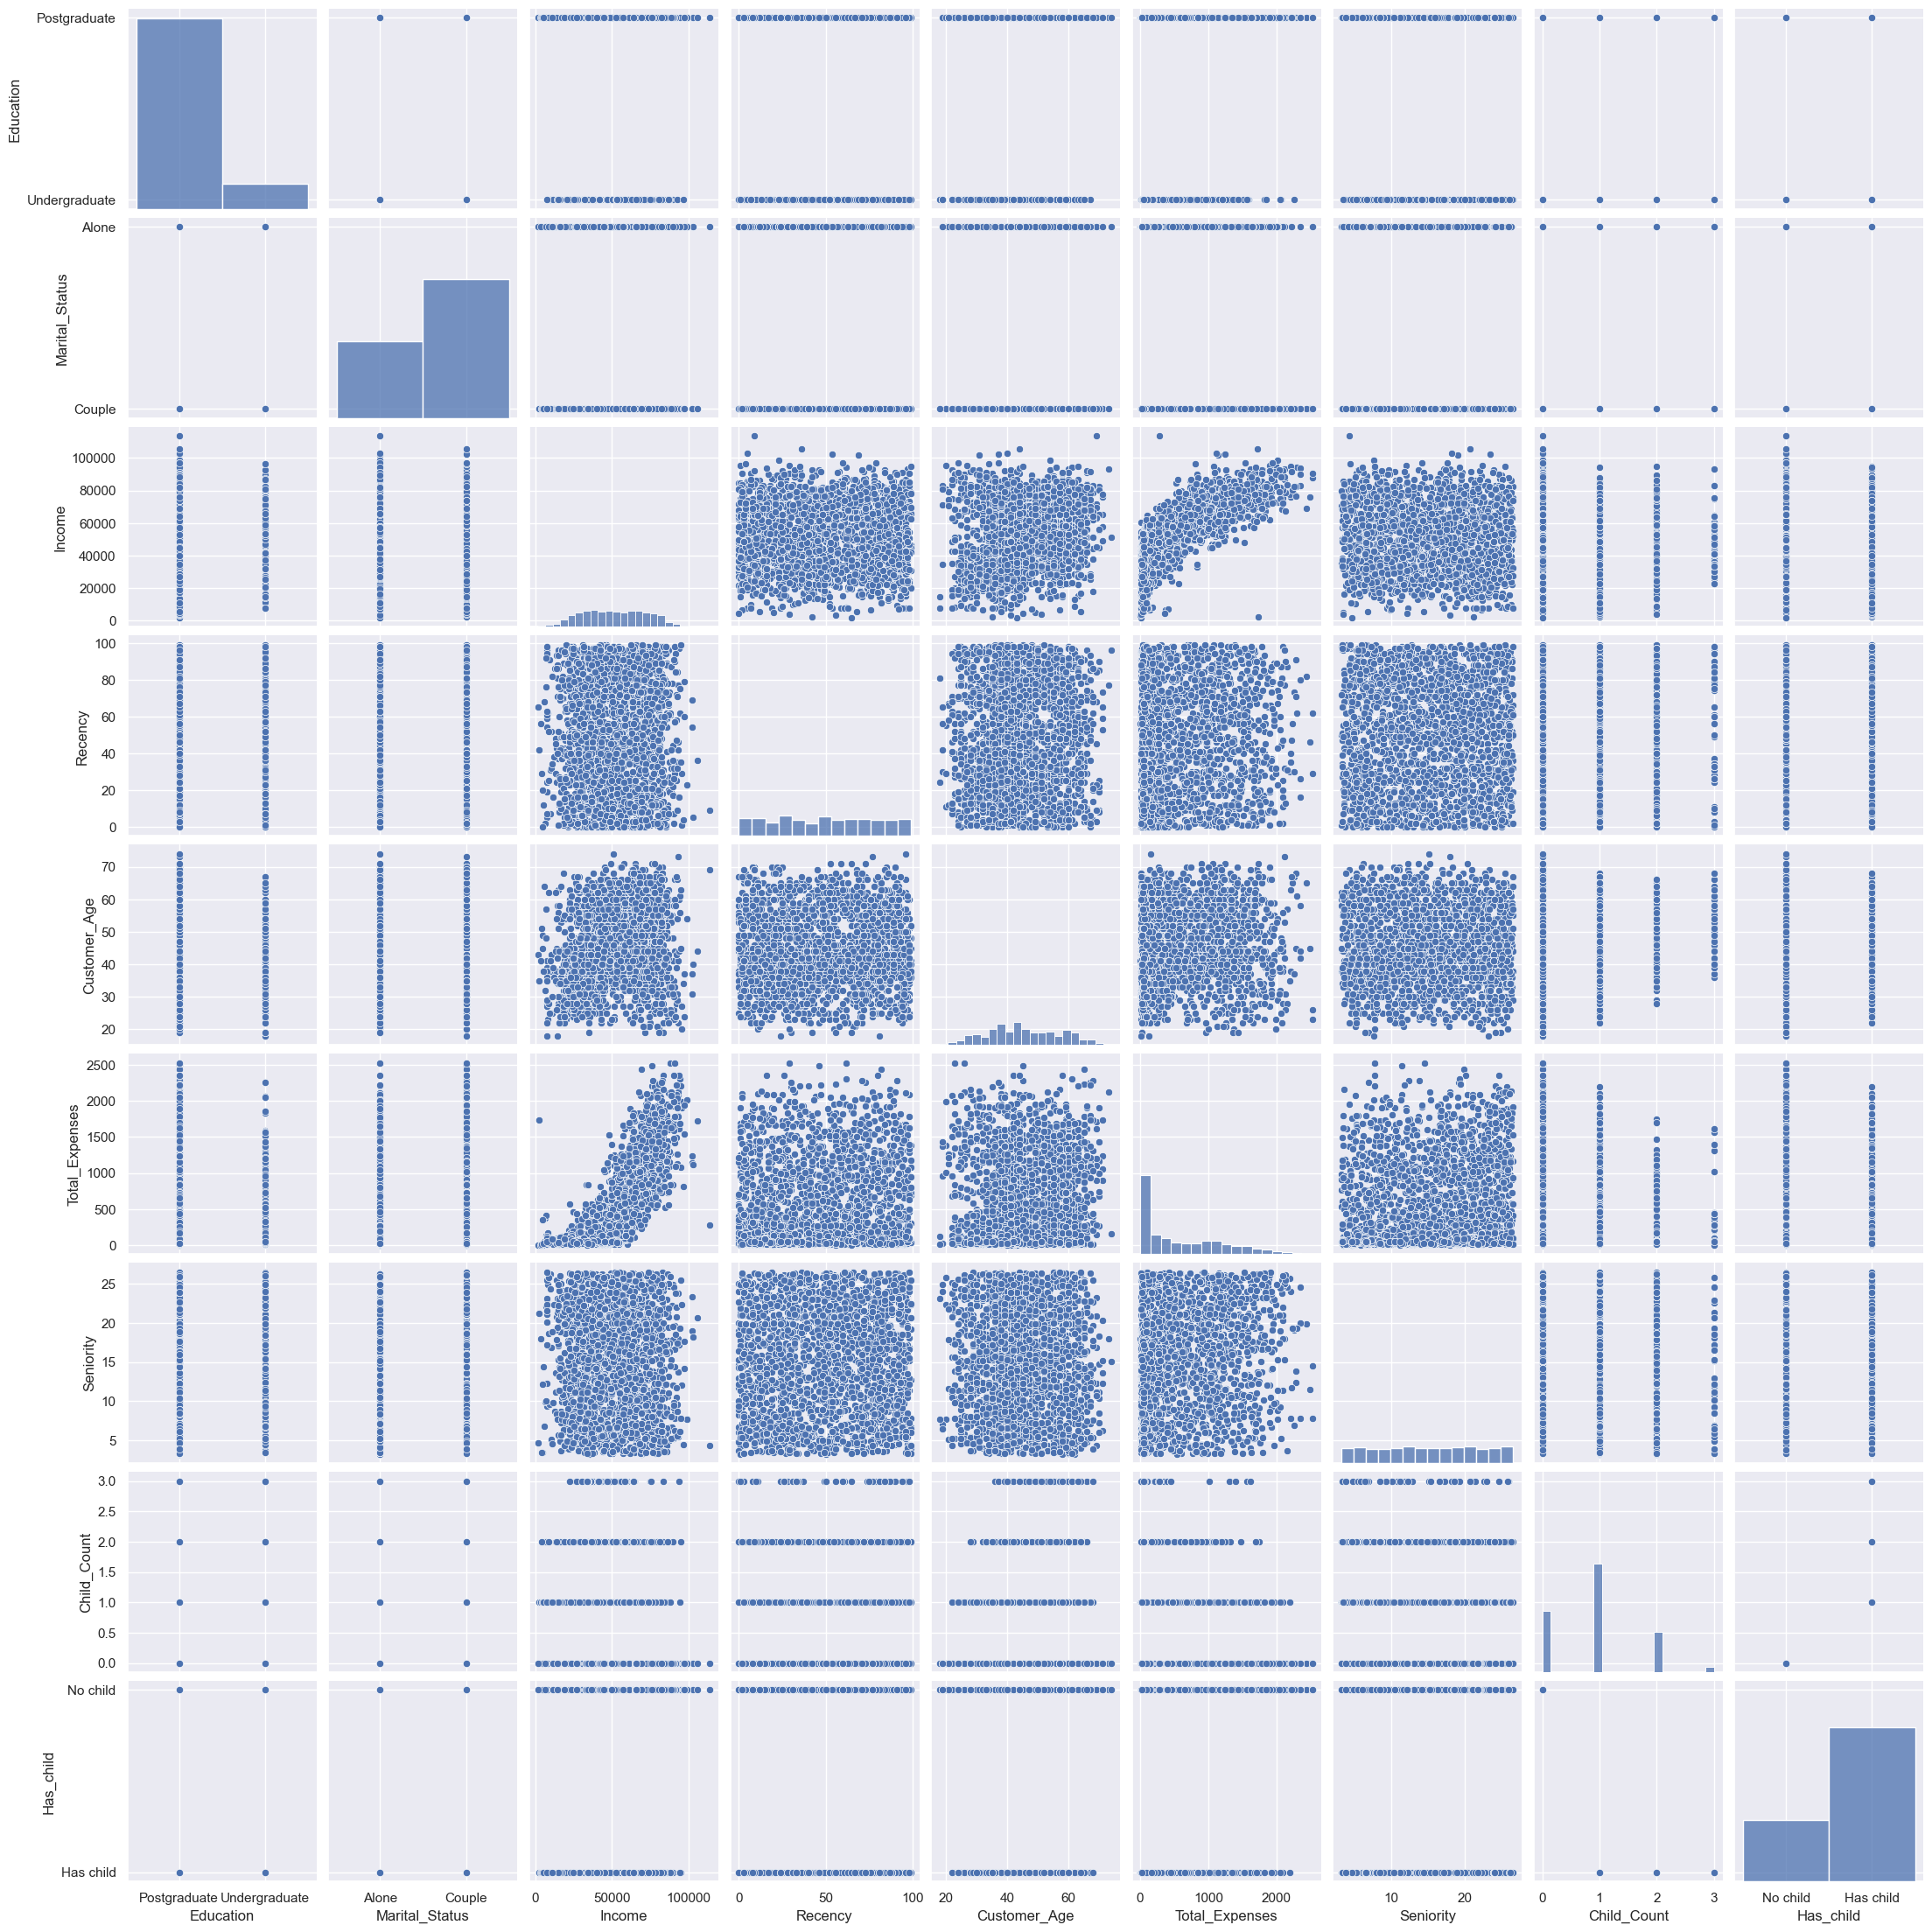

In [14]:
# plot the query
plot_data = query

# pair plot without outliers
sns.pairplot(data=plot_data, vars=plot_features)

## Outliers in 2 features

In [15]:
# find outliers based on Expenses and Income from above

expenses_thresh = 1500

query.query(f"`Total_Expenses` >= {expenses_thresh}")[['ID','Total_Expenses','Income']].sort_values("Income", ascending = True)

ID  Total_Expenses    Income
21    5376            1730    2447.0
804   3483            1526   48192.0
1530  6050            1513   57036.0
1839   531            1662   57333.0
0     5524            1617   58138.0
...    ...             ...       ...
1958  2109            1544   96843.0
2012   500            1941   96876.0
650   4248            2008   98777.0
1113  7451            2008   98777.0
646   4611            1724  105471.0

[239 rows x 3 columns]

In [16]:
income_thresh = 100000

query.query(f"`Income` >= {income_thresh}")[['ID','Total_Expenses','Income']].sort_values("Total_Expenses", ascending = True)

ID  Total_Expenses    Income
1898   4619             277  113734.0
252   10089            1112  102692.0
124    7215            1135  101970.0
203    2798            1240  102160.0
646    4611            1724  105471.0

In [17]:
# drop by index
query_temp = query.drop(21)
query2 = query_temp.drop(1898)

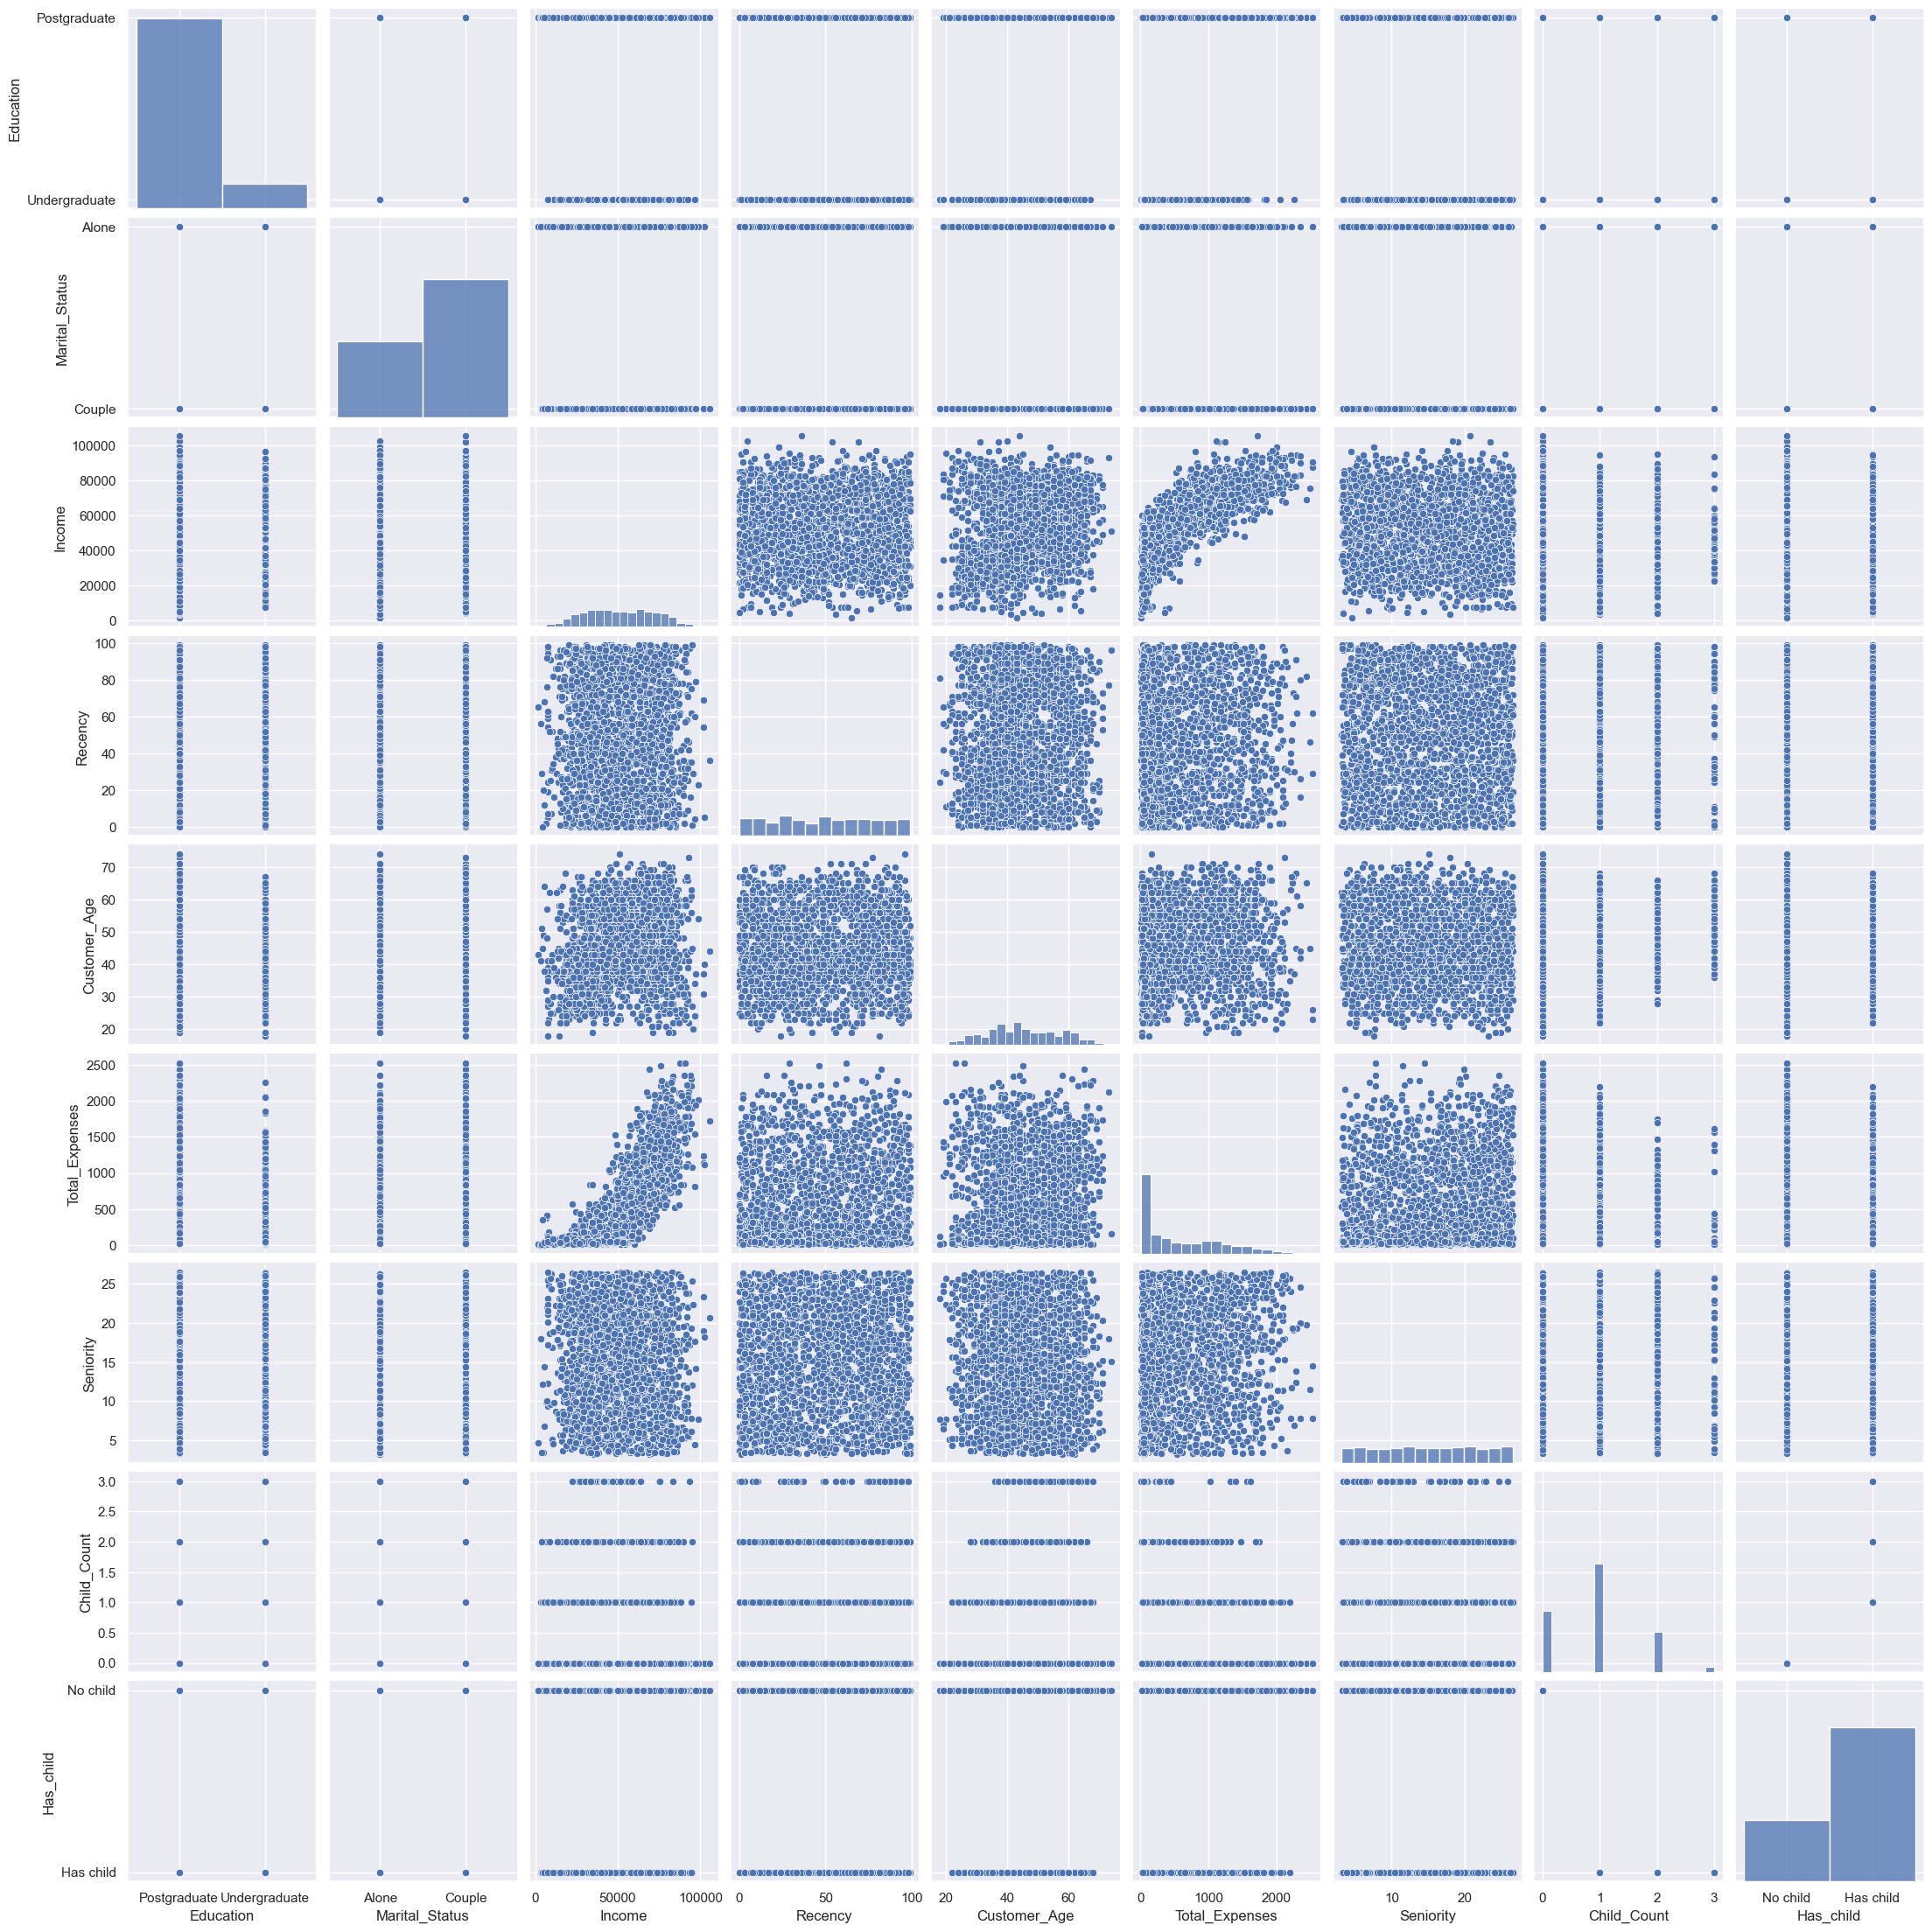

In [18]:
# plot the query
plot_data = query2

# pair plot without outliers
sns.pairplot(data=plot_data, vars=plot_features)

# Save the data

In [19]:
# index the data by ID

query2.set_index("ID", inplace=True)

In [20]:
# create a dictionary

dict = {'data':query2,
       'cluster_features':plot_features}

# pickle the dictionary

with open('customer_data_without_outliers.pickle', 'wb') as handle:
    pkl.dump(dict, handle, protocol=pkl.HIGHEST_PROTOCOL)